<a href="https://colab.research.google.com/github/innovateDotAI/ReadyToUseModels/blob/main/PGM_learning_structure_V2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Bayesian Networks from Data
### By using Maximum LikelyhoodEstimate,Mutual Information Gain and Max. Spanning Tree
To use this notebook(Written in Python) it is assumed that the user has a basic understanding of Bayesian networks. In case you are looking for a basic understanding of  Bayesian network then refer [link](https://www.sciencedirect.com/topics/mathematics/bayesian-network#:~:text=and%20Markov%20models-,A%20Bayesian%20network%20(BN)%20is%20a%20probabilistic%20graphical%20model%20for,belief%20networks%20or%20Bayes%20nets.)
This Blog is  written as Jupyter notebooks and run directly in Google Colab—a hosted notebook environment that requires no setup. Click the Run in Google Colab button.
### Bayesian network:
Bayesian network (BN) is one of the  probabilistic model which can be used for solving those problems where the outcome is non-deterministic and we need to use a probabilistic query to find the outcome. BN is a Directed Acyclic graph where each node in the graph can represent either a random variable, Factor, or a cluster of random variables. Edges in the graph represent the dependencies between these random variables. We can do Causal/Predictive/Diagnostic/Inter-causal kind of queries. In current blog queries are out of scope. This will be discussed separately in a different blog.


**Below is example representation of BN: (Taken from book Mastering Probabilistic Graphical Models Using Python by Ankur Ankan,Abinash Panda)**
![picture](https://drive.google.com/uc?id=1L6QR8ez3fo6_o7qZyVYUm8IjUMYzT74w)

In many situations we have data in tabular format, but we do not have any knowledge about how each column influences each other. Since relation not known, so drawing efficient Bayesian network is difficult. This blog will help you draw the Bayesian network with the step-by-step procedure in this situation. Before we get into Steps, we need to understand the method by which this is solved and what are limitations of this model. 
In practical situation we can have 4 different kinds of situation where we need to draw the Bayesian network by learning the structure from given dataset.
1.	Unknown Structure Complete Data: In this situation we have a complete dataset of all random variables, but we don’t know the relation among random variables. So we need to get effective relations among the variables in order to create Bayesian network and conditional probability distribution (CPD)
2.	Known Structure Incomplete Data: In this situation: We know the relation among variables, but some  random variable data missing which we can’t ignore. Under this circumstance we find CPD.
3.	Unknown Structure Incomplete Data: In this case both relation is unknow and data is incomplete. Under this circumstance we need to find structure and CPD.
4.	Latent (Hidden) Variables Incomplete Data: Sometime it so happens that we have some hidden variables which drives known Random Variables. We don't know if this exists or not. We also don't know how many hidden variables exist. On top of that data is also missing from Input data. All this adds challenges in defining the structure. Under this circumstance, we need to find which hidden variable needs to include and draw the CPDs or Factors.
### What problem do wwe adddress in this blog?
In this blog we will take the first case where we have complete data but structure is unknown. To make it simple for a conceptual purpose, we will use discrete data as input.
Data details: We have a continuous dataset of following column
1.	GLCM_pan
2.	Mean_Green
3.	Mean_Red
4.	Mean_NIR
5.	SD_pan and one column is discrete.
6.	Class
For simplification we will convert continuous data  discrete data using.

## Design Approach
![picture](https://drive.google.com/uc?id=1bEoZD83VNyZHHOZa3Kbier9YuqZ-iNSz)

## Data Preprocessing

## Data loading

The data file is publicly shared which needs to download and keep on your google drive. [Click on this link](https://drive.google.com/file/d/1fh0H9dLqstB7S1iRQmq2BMaDRu47sEMJ/view?usp=sharing)
Then mount the drive with your Google ID and load the file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv ('/content/drive/MyDrive/Public_Models/PGM_models/PGM_learning_structure/TreeData.csv') # File location on g-drive
print (df)

     class    GLCM_pan  Mean_Green    Mean_Red    Mean_NIR     SD_pan
0        w  120.362774  205.500000  119.395349  416.581395  20.676318
1        w  124.739583  202.800000  115.333333  354.333333  16.707151
2        w  134.691964  199.285714  116.857143  477.857143  22.496712
3        w  127.946309  178.368421   92.368421  278.473684  14.977453
4        w  135.431548  197.000000  112.690476  532.952381  17.604193
...    ...         ...         ...         ...         ...        ...
4334     n  111.568773  203.588235   93.264706  403.735294  26.512777
4335     n  125.435240  206.394161   93.058394  512.270073  33.466060
4336     n  132.123859  465.343750  295.333333  499.250000  38.762967
4337     n  124.469536  215.152632   98.484211  675.915789  28.506542
4338     n  125.171928  559.048000  365.968000  439.272000  15.392322

[4339 rows x 6 columns]


## Missing Data removal

**Check out the info(), head(), and describe() methods on dataset.**

In [ ]:
df.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4339 non-null   object 
 1   GLCM_pan    4339 non-null   float64
 2   Mean_Green  4339 non-null   float64
 3   Mean_Red    4339 non-null   float64
 4   Mean_NIR    4339 non-null   float64
 5   SD_pan      4339 non-null   float64
dtypes: float64(5), object(1)
memory usage: 203.5+ KB


**No missing data found so no further action.**

In [ ]:
df.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,126.831298,233.906908,117.292439,534.104683,24.924588
std,13.735836,60.757687,60.711159,154.495500,11.008303
min,0.000000,164.625000,59.142857,86.500000,0.000000
25%,118.589080,206.000000,91.975244,422.875000,18.009143
50%,127.479167,221.454545,101.727273,528.500000,23.612444
75%,135.043591,241.791304,116.866071,643.087037,29.899148
max,183.281250,955.714286,746.333333,1005.516129,156.508431


## Removal of Outliear
I have used mean +- 3 sigma for outlier detection.

![picture](https://drive.google.com/uc?id=1TCdpFBV9b9eWZzW8xh3-EEyWL-09kB6V)

Any data outside this range is an outlier (Just to keep it simple, but you can adopt any other method which is suitable for your case.)

In [ ]:
df.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,126.831298,233.906908,117.292439,534.104683,24.924588
std,13.735836,60.757687,60.711159,154.495500,11.008303
min,0.000000,164.625000,59.142857,86.500000,0.000000
25%,118.589080,206.000000,91.975244,422.875000,18.009143
50%,127.479167,221.454545,101.727273,528.500000,23.612444
75%,135.043591,241.791304,116.866071,643.087037,29.899148
max,183.281250,955.714286,746.333333,1005.516129,156.508431


In [ ]:
def OutlierDataRemoval(df,colName):
    mean = df.describe().iloc[1][colName]
    std = df.describe().iloc[2][colName]
    Upper_limit = mean+3*std
    Lower_limit = mean-3*std
    df1 = df.loc[(df[colName] > Lower_limit) & (df[colName] < Upper_limit)]
    return df1

In [ ]:
df_afterOutlierRemoval = df
for i in df.describe().columns:
    df_afterOutlierRemoval = OutlierDataRemoval(df_afterOutlierRemoval,i)

In [ ]:
df_afterOutlierRemoval.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000
mean,127.200410,223.054161,105.883161,533.912596,24.041271
std,12.447742,25.865116,22.599153,154.483433,8.373942
min,86.617021,164.625000,59.142857,86.500000,0.471405
25%,118.739838,204.978704,91.451747,423.137500,18.010177
50%,127.778819,219.513158,100.470736,530.558548,23.405697
75%,135.213489,237.857143,114.130096,643.222685,29.284207
max,167.912500,412.721519,211.090909,981.600000,52.000000


## Descritization of data using Mean and Standard deviations
**Assuming data has Gaussian distribution.**

![picture](https://drive.google.com/uc?id=18uPz1EDn9XACOxED65h2ETJNA02i_CG6)

In [ ]:
df_descrite = df_afterOutlierRemoval

In [ ]:
df_descrite.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000
mean,127.200410,223.054161,105.883161,533.912596,24.041271
std,12.447742,25.865116,22.599153,154.483433,8.373942
min,86.617021,164.625000,59.142857,86.500000,0.471405
25%,118.739838,204.978704,91.451747,423.137500,18.010177
50%,127.778819,219.513158,100.470736,530.558548,23.405697
75%,135.213489,237.857143,114.130096,643.222685,29.284207
max,167.912500,412.721519,211.090909,981.600000,52.000000


In [ ]:
import pandas as pd
import numpy as np
for colName in df_descrite.describe().columns:
    #colName = 'Mean_Green'
    mean = df_descrite.describe().iloc[1][colName]
    std = df_descrite.describe().iloc[2][colName]
    minimum = df_descrite.describe().iloc[3][colName]
    maximum = df_descrite.describe().iloc[7][colName]
    UpperSide = mean+1*std
    LowerSide = mean-1*std
    lable = colName+'_Label'
    df_descrite[lable] = pd.cut(x=df_descrite[colName], bins=[minimum-1, LowerSide, UpperSide, maximum+1],labels=['Low', 'Medium', 'High'])

for colName in df_afterOutlierRemoval.describe().columns:
    df_descrite.drop(colName, axis=1, inplace=True)
print("After: ")
print(df_descrite)
print("Categories: ")
for colName in df_descrite.columns:
    print(df_descrite[colName].value_counts())

After: 
     class GLCM_pan_Label Mean_Green_Label Mean_Red_Label Mean_NIR_Label  \
0        w         Medium           Medium         Medium         Medium   
1        w         Medium           Medium         Medium            Low   
2        w         Medium           Medium         Medium         Medium   
3        w         Medium              Low         Medium            Low   
4        w         Medium              Low         Medium         Medium   
...    ...            ...              ...            ...            ...   
4331     n         Medium             High           High         Medium   
4333     n           High           Medium         Medium         Medium   
4334     n            Low           Medium         Medium         Medium   
4335     n         Medium           Medium         Medium         Medium   
4337     n         Medium           Medium         Medium         Medium   

     SD_pan_Label  
0          Medium  
1          Medium  
2          Medium  

## Structure and CPD learning for BN 
**Our Data is now ready for structure learning and finding CPD (conditional probability distribution). ** Random Variable: Each column name is treated as a random variable. Mutual Information Gain: Based on Information theory, we find the Mutual...

![picture](https://drive.google.com/uc?id=1ThM3Eg3U_w9FGR_zcCEfwijLYN7e5yGA)

Where:
Ip(X,Y) = Mutual Information Gain between RV(X,Y) 
P(x,y) is joint probability of RV(x,y) 
P(x) is probability of RV(X) 
P(y) is probability of RV(y) 
MLE (Maximum Likelihood estimate): We are using MLE to predict the probability of RV's. MLE works well when observed RV's count tends to infinity. In case small dataset, there is a very high chance of overfitting. So we need to keep records in million in order to achieve accuracy. 
Approach: 1.	Use Mutual Information (MI) to find dependency between two Random Variable.
2.	Find MI for all possible combinations of RV's
3.	Create Complete Graph which MI as the weight of each node.
4.	Use Prim algorithm to find Maximum spanning tree based on MI values of each edge in a complete graph.
5.	MST is one possible structure that can be used as BN.
Since MI do to tell the direction of dependency so either of them could be parent and child. With this MST can have many directions possible based on this. For further refining the finding best possible structure. We can generate all possible candidate structure in hypothesis space and create one heuristic function like BIC score. We can optimize this BIC score using various AI based heuristic algorithms like hill climbing algorithm, Best first search, Simulated annealing, etc. But in this blog, I will be covering till Stpe-5. other steps will be discussed in the next blog. One  of the important step in finding better structure is to discuss with Domain expert with MST and decide upon dependency. This input will always get precedence and can be helpful in reducing hypothesis space.   Score. We can optimize this BIC score using many heuristic algorithms like Heuristic hill climbing algorithm, Best first search, Simulated annealing, etc. But in this blog I will be covering till Step-5. Other steps will be discussed in the next blog. Other suggested best way is to discuss with Domain expert with MST and decide upon dependency. 

## Finding relation between two random variables(RV)
**1. we will create pair of all RV**

**2. Find their MLE(Maximum Likelyhood. When data tends to infity then MLE is as good as Bayesian Parameter Estimate**

**3. Find Mutual Infoirmation gain between RV's**


In [ ]:
# Assume all column of datafreame is Random Vaariables
RV_list = list(df_descrite.columns)
lst = []  
while(len(RV_list)>1):
    source = RV_list[0]
    #print('Soruce',source)
    RV_list.remove(source)
    #print('RV_list:',RV_list)
    for col2 in RV_list:
        #print('Target',col2)
        combi =[]
        combi.append(source)
        combi.append(col2)
        lst.append(tuple(combi))
print(lst)
            

[('class', 'GLCM_pan_Label'), ('class', 'Mean_Green_Label'), ('class', 'Mean_Red_Label'), ('class', 'Mean_NIR_Label'), ('class', 'SD_pan_Label'), ('GLCM_pan_Label', 'Mean_Green_Label'), ('GLCM_pan_Label', 'Mean_Red_Label'), ('GLCM_pan_Label', 'Mean_NIR_Label'), ('GLCM_pan_Label', 'SD_pan_Label'), ('Mean_Green_Label', 'Mean_Red_Label'), ('Mean_Green_Label', 'Mean_NIR_Label'), ('Mean_Green_Label', 'SD_pan_Label'), ('Mean_Red_Label', 'Mean_NIR_Label'), ('Mean_Red_Label', 'SD_pan_Label'), ('Mean_NIR_Label', 'SD_pan_Label')]


In [ ]:
data = df_descrite
# Assume all column of datafreame is Random Vaariables
RV_list = list(data.columns)
lst = []  
while(len(RV_list)>1):
    source = RV_list[0]
    #print('Soruce',source)
    RV_list.remove(source)
    #print('RV_list:',RV_list)
    for col2 in RV_list:
        #print('Target',col2)
        combi =[]
        combi.append(source)
        combi.append(col2)
        lst.append(tuple(combi))
print(lst)

[('class', 'GLCM_pan_Label'), ('class', 'Mean_Green_Label'), ('class', 'Mean_Red_Label'), ('class', 'Mean_NIR_Label'), ('class', 'SD_pan_Label'), ('GLCM_pan_Label', 'Mean_Green_Label'), ('GLCM_pan_Label', 'Mean_Red_Label'), ('GLCM_pan_Label', 'Mean_NIR_Label'), ('GLCM_pan_Label', 'SD_pan_Label'), ('Mean_Green_Label', 'Mean_Red_Label'), ('Mean_Green_Label', 'Mean_NIR_Label'), ('Mean_Green_Label', 'SD_pan_Label'), ('Mean_Red_Label', 'Mean_NIR_Label'), ('Mean_Red_Label', 'SD_pan_Label'), ('Mean_NIR_Label', 'SD_pan_Label')]


In [ ]:
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 20.3 MB/s 


In [ ]:
import numpy as np
import math
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator

# generate data
InfoGainList = []
for rv in lst:
    print(rv)
    model1 = BayesianModel([rv])
    model2 = BayesianModel([(rv[1],rv[0])])

    mle1 = MaximumLikelihoodEstimator(model1, data)
    mle2 = MaximumLikelihoodEstimator(model2, data)
    mleA = mle1.estimate_cpd(rv[0]) # unconditional
    mleB = mle2.estimate_cpd(rv[1])
    mleA_B = mle1.estimate_cpd(rv[1])
    #print(mleB,mleA,mleA_B)
    B_list = list(data[rv[1]].unique())
    A_list = list(data[rv[0]].unique())
    # Information Gain Calculation
    InfoGain=0

    for i in range(len(B_list)):
        InfoDict = {}
        for j in range(len(A_list)):
#             print('mleA_B.values[',i,j,']:',mleA_B.values[i,j])
#             print('mleA.values[',j,']:',mleA.values[j])
#             print('mleB.values[',i,']:',mleB.values[i])
            x_log = (mleA_B.values[i,j]/(mleA.values[j]*mleB.values[i]))
            if x_log ==0:
                InfoGain = InfoGain
            else:
                InfoGain = InfoGain +mleA_B.values[i,j]*math.log10(x_log)
#             print(InfoGain)
        InfoDict['Node1'] = rv[0]
        InfoDict['Node2'] = rv[1]
        InfoDict['InfoGain'] = int(InfoGain*1000) # Multiplying with 1000 to avoid vanishing effect of small numbers.
    print(InfoDict)
    InfoGainList.append(InfoDict)

print(InfoGainList)    
#df_InfoGain = pd.DataFrame.from_dict(InfoGainList)

('class', 'GLCM_pan_Label')
{'Node1': 'class', 'Node2': 'GLCM_pan_Label', 'InfoGain': 1796}
('class', 'Mean_Green_Label')


/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


{'Node1': 'class', 'Node2': 'Mean_Green_Label', 'InfoGain': 1844}
('class', 'Mean_Red_Label')
{'Node1': 'class', 'Node2': 'Mean_Red_Label', 'InfoGain': 1812}
('class', 'Mean_NIR_Label')
{'Node1': 'class', 'Node2': 'Mean_NIR_Label', 'InfoGain': 1856}
('class', 'SD_pan_Label')
{'Node1': 'class', 'Node2': 'SD_pan_Label', 'InfoGain': 1788}
('GLCM_pan_Label', 'Mean_Green_Label')
{'Node1': 'GLCM_pan_Label', 'Node2': 'Mean_Green_Label', 'InfoGain': 1834}
('GLCM_pan_Label', 'Mean_Red_Label')
{'Node1': 'GLCM_pan_Label', 'Node2': 'Mean_Red_Label', 'InfoGain': 1835}
('GLCM_pan_Label', 'Mean_NIR_Label')
{'Node1': 'GLCM_pan_Label', 'Node2': 'Mean_NIR_Label', 'InfoGain': 1852}
('GLCM_pan_Label', 'SD_pan_Label')
{'Node1': 'GLCM_pan_Label', 'Node2': 'SD_pan_Label', 'InfoGain': 1853}
('Mean_Green_Label', 'Mean_Red_Label')
{'Node1': 'Mean_Green_Label', 'Node2': 'Mean_Red_Label', 'InfoGain': 2536}
('Mean_Green_Label', 'Mean_NIR_Label')
{'Node1': 'Mean_Green_Label', 'Node2': 'Mean_NIR_Label', 'InfoGain': 

**Ignore all warinings**
## Create Complete Graph for given RV:

In [ ]:
#Create Complete Graph for given RV:
import networkx as nx
G = nx.Graph()
for i in InfoGainList:
    node1 = i['Node1']
    node2 = i['Node2']
    weight1 = int(i['InfoGain'])
    G.add_edge(node1, node2, weight=weight1)

for line in nx.generate_edgelist(G, data=True):
    print(line)

class GLCM_pan_Label {'weight': 1796}
class Mean_Green_Label {'weight': 1844}
class Mean_Red_Label {'weight': 1812}
class Mean_NIR_Label {'weight': 1856}
class SD_pan_Label {'weight': 1788}
GLCM_pan_Label Mean_Green_Label {'weight': 1834}
GLCM_pan_Label Mean_Red_Label {'weight': 1835}
GLCM_pan_Label Mean_NIR_Label {'weight': 1852}
GLCM_pan_Label SD_pan_Label {'weight': 1853}
Mean_Green_Label Mean_Red_Label {'weight': 2536}
Mean_Green_Label Mean_NIR_Label {'weight': 2187}
Mean_Green_Label SD_pan_Label {'weight': 1896}
Mean_Red_Label Mean_NIR_Label {'weight': 2512}
Mean_Red_Label SD_pan_Label {'weight': 2182}
Mean_NIR_Label SD_pan_Label {'weight': 1779}


[('SD_pan_Label', 'Mean_Red_Label'), ('Mean_Red_Label', 'Mean_Green_Label'), ('Mean_Red_Label', 'Mean_NIR_Label'), ('Mean_NIR_Label', 'class'), ('SD_pan_Label', 'GLCM_pan_Label')]


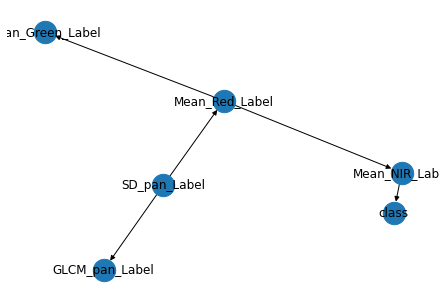

In [ ]:
from networkx.algorithms import tree
# G = nx.cycle_graph(4)
# G.add_edge(0, 3, weight=2)
mst = tree.maximum_spanning_edges(G, algorithm="prim", data=False)
edgelist = list(mst)
#sorted(sorted(e) for e in edgelist)
print(edgelist)
BayesianNetworkStrucutre = nx.DiGraph()
for edge in edgelist:
    BayesianNetworkStrucutre.add_edge(edge[0],edge[1])
nx.draw(BayesianNetworkStrucutre,with_labels=True,node_size=500)

## CPD Calculation for generated Bayesian Network

In [ ]:
nodeList =[]
for i in edgelist:
    print(i)
    nodeList.append(i[0])
    nodeList.append(i[1])
print(list(set(nodeList)))
    
BNmodel = BayesianModel(edgelist)
cpd = MaximumLikelihoodEstimator(BNmodel, data)
for node in nodeList:
    print(cpd.estimate_cpd(node)) 

('SD_pan_Label', 'Mean_Red_Label')
('Mean_Red_Label', 'Mean_Green_Label')
('Mean_Red_Label', 'Mean_NIR_Label')
('Mean_NIR_Label', 'class')
('SD_pan_Label', 'GLCM_pan_Label')
['SD_pan_Label', 'Mean_NIR_Label', 'Mean_Green_Label', 'Mean_Red_Label', 'GLCM_pan_Label', 'class']
+----------------------+----------+
| SD_pan_Label(High)   | 0.157895 |
+----------------------+----------+
| SD_pan_Label(Low)    | 0.157403 |
+----------------------+----------+
| SD_pan_Label(Medium) | 0.684702 |
+----------------------+----------+
+------------------------+-----+----------------------+
| SD_pan_Label           | ... | SD_pan_Label(Medium) |
+------------------------+-----+----------------------+
| Mean_Red_Label(High)   | ... | 0.10775862068965517  |
+------------------------+-----+----------------------+
| Mean_Red_Label(Low)    | ... | 0.06968390804597702  |
+------------------------+-----+----------------------+
| Mean_Red_Label(Medium) | ... | 0.8225574712643678   |
+------------------------+

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,



+----------------------+----------+
| SD_pan_Label(High)   | 0.157895 |
+----------------------+----------+
| SD_pan_Label(Low)    | 0.157403 |
+----------------------+----------+
| SD_pan_Label(Medium) | 0.684702 |
+----------------------+----------+
+------------------------+-----+----------------------+
| SD_pan_Label           | ... | SD_pan_Label(Medium) |
+------------------------+-----+----------------------+
| GLCM_pan_Label(High)   | ... | 0.13613505747126436  |
+------------------------+-----+----------------------+
| GLCM_pan_Label(Low)    | ... | 0.15445402298850575  |
+------------------------+-----+----------------------+
| GLCM_pan_Label(Medium) | ... | 0.7094109195402298   |
+------------------------+-----+----------------------+


## Conclusion

This notebook has been designed with scalability of dataset in terms of dimension. We can import any number of columns with theoretically any number of RV's with your processing capacity of computing machine. But we need to mindful the prim is a deterministic algorithm so performance will degrade with very high number of RV's. We also need to be mindful that MLE should not overfit and there should not be   zero probability of any of the RV. If this is happening need to get more data or adopt other methods of Parameter estimation.

**Desing and developed by**

Bipin Kumar Sinha

innovatedotai@gmail.com

